In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from collections import Counter



In [15]:
raw_telco = pd.read_csv('Telco.csv')
raw_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
raw_telco['TotalCharges'] = raw_telco['TotalCharges'].map({'':0})

In [24]:
numerical_features = raw_telco.select_dtypes(include=['int64', 'float64'])

In [25]:
numerical_features.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,furnishingstatus
0,0,1,29.85,NaN,NaN
1,0,34,56.95,NaN,NaN
2,0,2,53.85,NaN,NaN
3,0,45,42.30,NaN,NaN
4,0,2,70.70,NaN,NaN


Text(0.5, 1.0, 'House Correlation Heatmap')

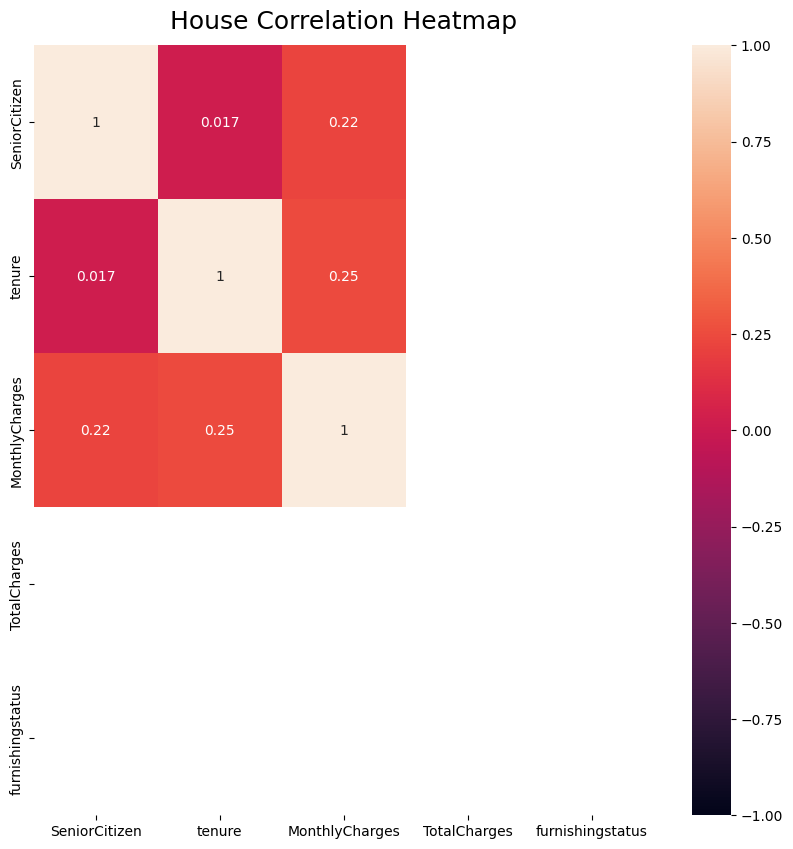

In [26]:
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(numerical_features.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('House Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

In [6]:
numerical_features = raw_boston.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

In [7]:
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price 

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64

In [8]:
X = numerical_features.drop(columns='price')

In [9]:
X = numerical_features.drop(columns=['price', 'hotwaterheating'])

In [10]:
Y = numerical_features['price']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)

In [13]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)
Y_pred_poly = poly_model.predict(X_poly_test)

In [14]:
# Calculate performance metrics for both models
# mse_linear = metrics.mean_squared_error(Y_test, Y_pred_linear)
r2_linear = metrics.r2_score(Y_test, Y_pred_linear)
# mse_poly = metrics.mean_squared_error(Y_test, Y_pred_poly)
r2_poly = metrics.r2_score(Y_test, Y_pred_poly)
# mse_linear, mse_poly,
r2_linear, r2_poly

(0.6828901886596498, 0.6220561803459876)